# Diva comparison

Comparing the results on the Attacks on Diva using the `Hard Voting Classifier`

In [20]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../"
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the diva data

In [22]:
from utils.dataloading.diva import load_diva_data, load_diva_randomforest # type: ignore
DATASET = "diva"
assert DATASET == "diva" # to avoid problems when duplicating the notebook
BB = load_diva_randomforest()
BB_DATA = load_diva_data("diva-blackbox-data2.npz")

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2094
           1       0.85      0.77      0.81       745

    accuracy                           0.90      2839
   macro avg       0.89      0.86      0.87      2839
weighted avg       0.90      0.90      0.90      2839



In the following experiments:
* Data: indicates the data used to create the Explainer.
* Attack: indicates the data used to create the Shadow Models.
* Explainer: The Explainer used (Either the Lime Regressor or the Decision Tree).
* Filter: if true the *Data* have been filtered using mean + 3std.
* Instances Selection: 3-elems per quantile or distance-based approach

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [23]:
PATH = Path('../../decision_tree/decision_tree_dataset_no3std/diva/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      5186
         out       0.33      0.02      0.04      2248

    accuracy                           0.69      7434
   macro avg       0.52      0.50      0.43      7434
weighted avg       0.59      0.69      0.58      7434


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4910
         out       0.37      0.02      0.03      2120

    accuracy                           0.70      7030
   macro avg       0.54      0.50      0.42      7030
weighted avg       0.60      0.70      0.58      7030


Class 1
              precision    recall  f1-score   support

          in       0.68      0.87      0.76       276
         out       0.27      0.10      0.15       128

    accuracy                           0.63       404
   macro avg       0.47      0.49      0.45       404
weighted avg       0.55      0.63      0.57 

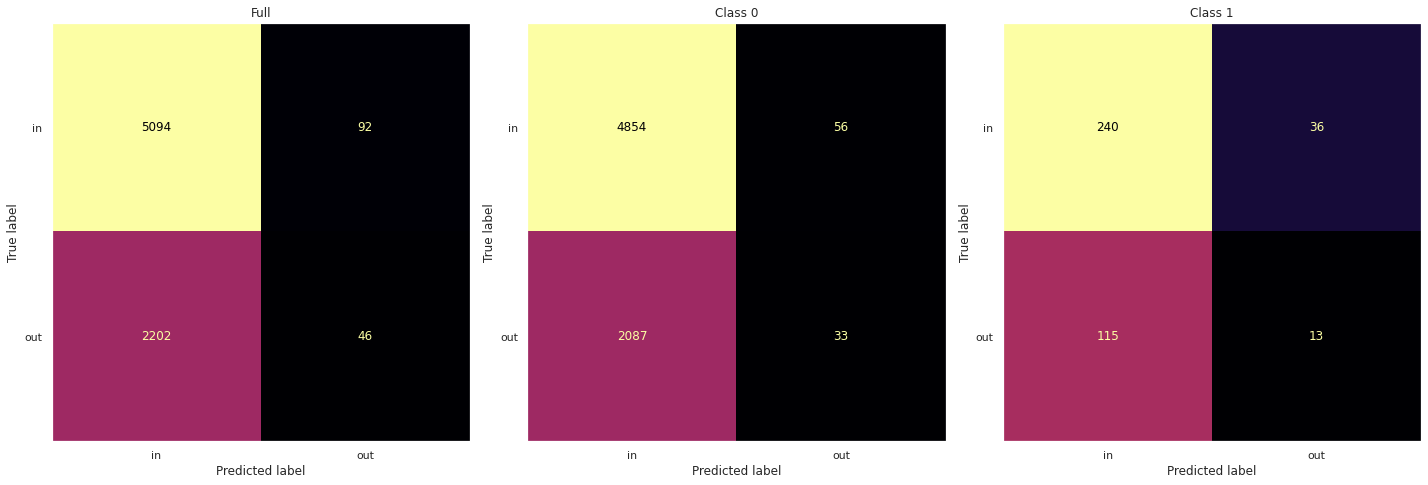

In [24]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [25]:
PATH = Path(f"../../decision_tree/decision_tree_dataset/diva/experiment_output")
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.71      0.27      0.39      6590
         out       0.30      0.74      0.43      2815

    accuracy                           0.41      9405
   macro avg       0.50      0.50      0.41      9405
weighted avg       0.59      0.41      0.40      9405


Class 0
              precision    recall  f1-score   support

          in       0.67      0.03      0.06      4943
         out       0.30      0.97      0.46      2147

    accuracy                           0.31      7090
   macro avg       0.49      0.50      0.26      7090
weighted avg       0.56      0.31      0.18      7090


Class 1
              precision    recall  f1-score   support

          in       0.71      0.98      0.82      1647
         out       0.24      0.02      0.04       668

    accuracy                           0.70      2315
   macro avg       0.48      0.50      0.43      2315
weighted avg       0.57      0.70      0.60 

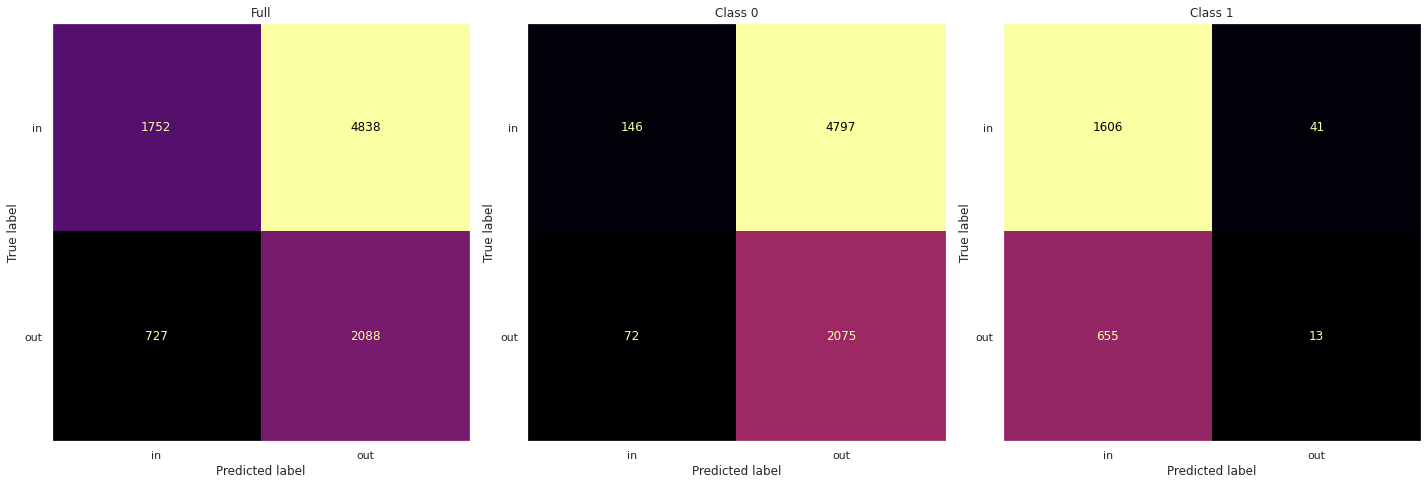

In [26]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `False` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have not been filtered.

In [27]:
PATH = Path('../../standard_lime/lime_generated/diva/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.28      0.40      6604
         out       0.30      0.72      0.42      2827

    accuracy                           0.41      9431
   macro avg       0.50      0.50      0.41      9431
weighted avg       0.58      0.41      0.41      9431


Class 0
              precision    recall  f1-score   support

          in       0.64      0.04      0.08      4946
         out       0.30      0.94      0.46      2156

    accuracy                           0.32      7102
   macro avg       0.47      0.49      0.27      7102
weighted avg       0.54      0.32      0.20      7102


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1658
         out       0.11      0.00      0.00       671

    accuracy                           0.71      2329
   macro avg       0.41      0.50      0.42      2329
weighted avg       0.54      0.71      0.59 

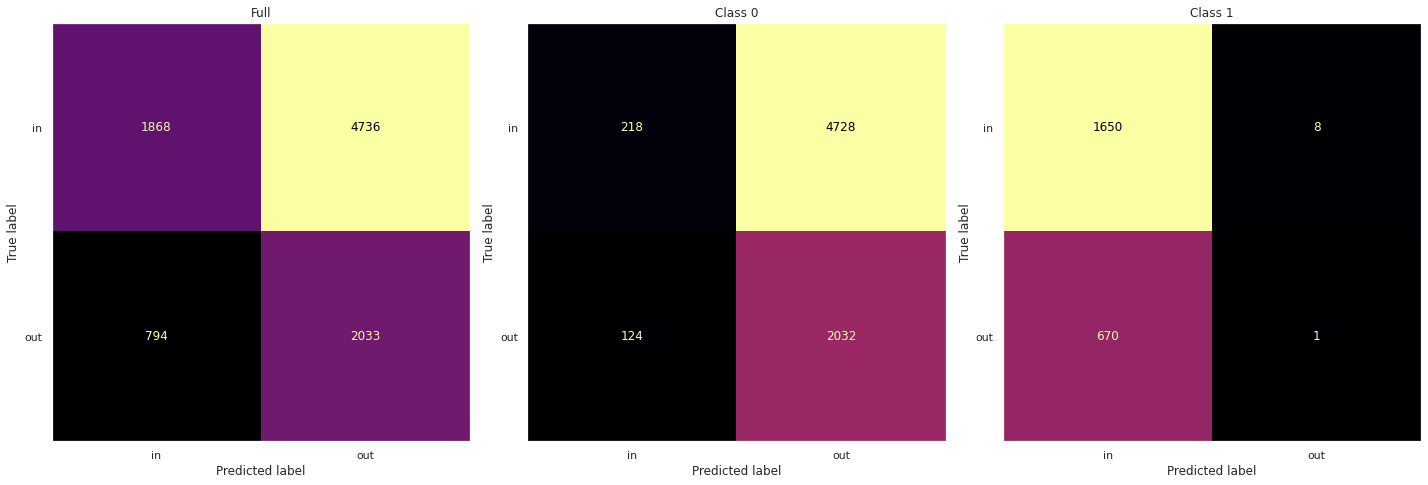

In [28]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Regressor` Filter: `True` Instances Selection: `Distance`
Here the attack dataset is the one generated by LIME, the same one used to train the Decision Trees. The generated points have been filtered.

In [29]:
PATH = Path('../../standard_lime/lime_generated_filter/diva/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      6487
         out       0.39      0.03      0.06      2760

    accuracy                           0.70      9247
   macro avg       0.55      0.51      0.44      9247
weighted avg       0.61      0.70      0.59      9247


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      4835
         out       0.38      0.03      0.06      2093

    accuracy                           0.69      6928
   macro avg       0.54      0.50      0.44      6928
weighted avg       0.60      0.69      0.59      6928


Class 1
              precision    recall  f1-score   support

          in       0.72      0.99      0.83      1652
         out       0.50      0.02      0.04       667

    accuracy                           0.71      2319
   macro avg       0.61      0.51      0.44      2319
weighted avg       0.65      0.71      0.60 

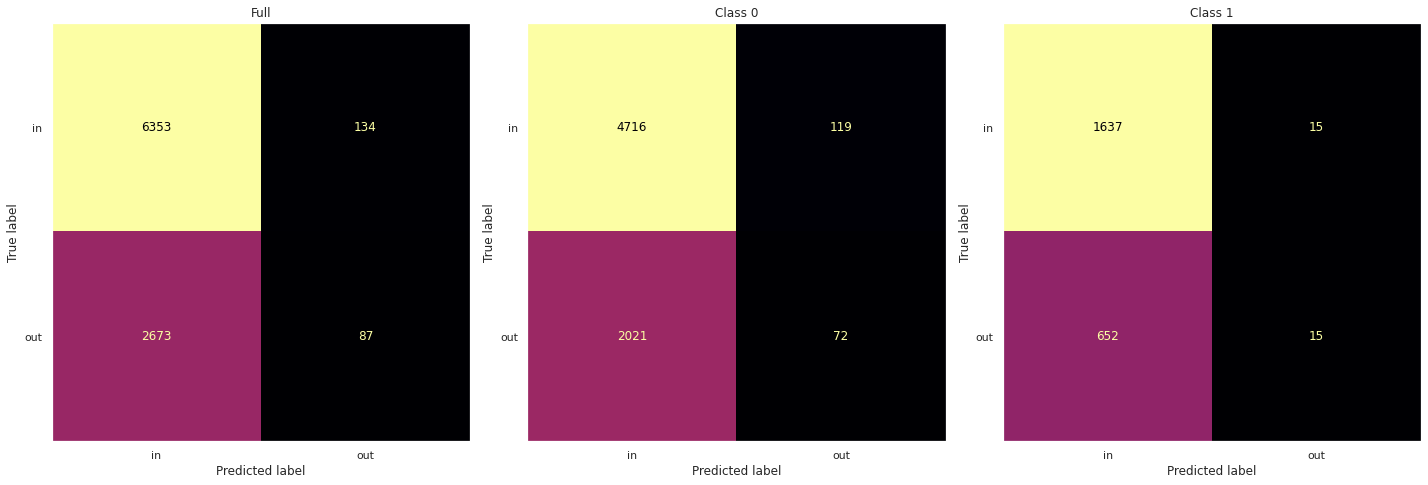

In [30]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [31]:
PATH = Path('../../decision_tree/statistical_no3std/diva/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      6601
         out       0.33      0.01      0.03      2827

    accuracy                           0.70      9428
   macro avg       0.52      0.50      0.42      9428
weighted avg       0.59      0.70      0.58      9428


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4959
         out       0.39      0.01      0.01      2161

    accuracy                           0.70      7120
   macro avg       0.54      0.50      0.42      7120
weighted avg       0.60      0.70      0.57      7120


Class 1
              precision    recall  f1-score   support

          in       0.71      0.96      0.82      1642
         out       0.32      0.04      0.08       666

    accuracy                           0.70      2308
   macro avg       0.51      0.50      0.45      2308
weighted avg       0.60      0.70      0.60 

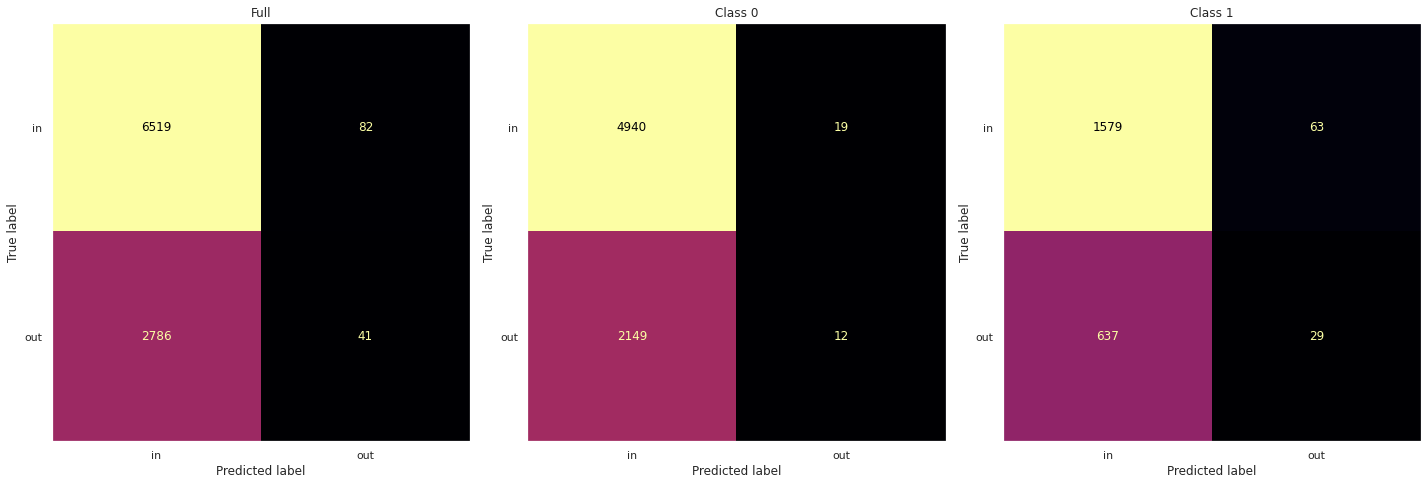

In [32]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [33]:
PATH = Path('../../decision_tree/statistical/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      6477
         out       0.30      0.02      0.04      2770

    accuracy                           0.69      9247
   macro avg       0.50      0.50      0.43      9247
weighted avg       0.58      0.69      0.58      9247


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4945
         out       0.29      0.00      0.01      2156

    accuracy                           0.69      7101
   macro avg       0.50      0.50      0.41      7101
weighted avg       0.57      0.69      0.57      7101


Class 1
              precision    recall  f1-score   support

          in       0.71      0.93      0.81      1532
         out       0.30      0.07      0.11       614

    accuracy                           0.69      2146
   macro avg       0.51      0.50      0.46      2146
weighted avg       0.60      0.69      0.61 

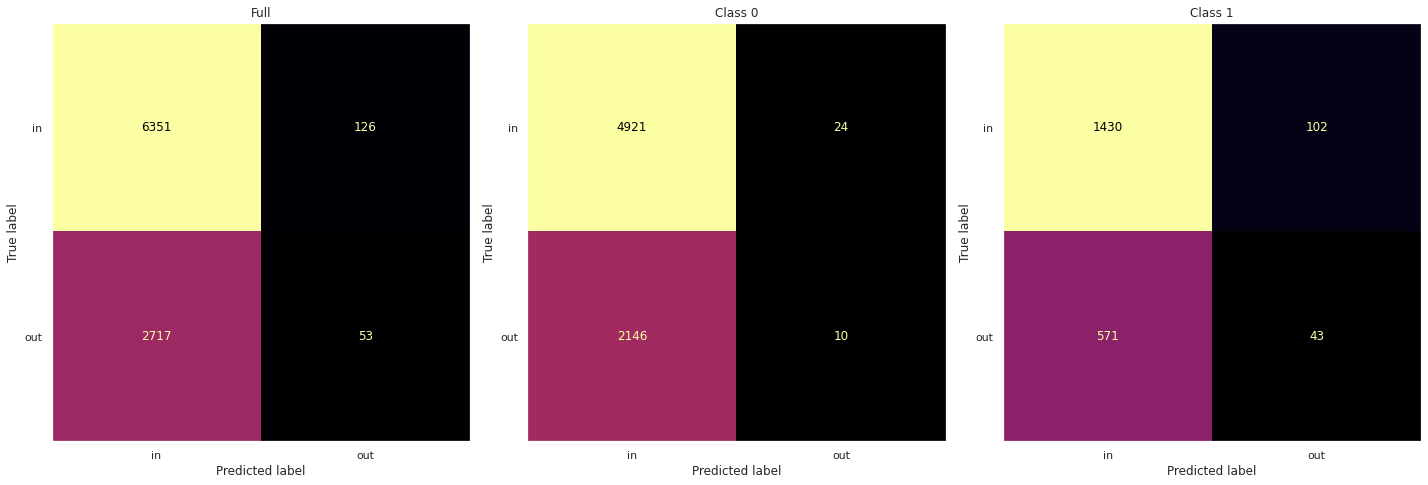

In [34]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [35]:
PATH = Path('../../decision_tree/statistical_noisy/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      6568
         out       0.32      0.01      0.02      2814

    accuracy                           0.70      9382
   macro avg       0.51      0.50      0.42      9382
weighted avg       0.59      0.70      0.58      9382


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4948
         out       0.38      0.01      0.01      2157

    accuracy                           0.70      7105
   macro avg       0.54      0.50      0.42      7105
weighted avg       0.60      0.70      0.58      7105


Class 1
              precision    recall  f1-score   support

          in       0.71      0.97      0.82      1620
         out       0.29      0.03      0.06       657

    accuracy                           0.70      2277
   macro avg       0.50      0.50      0.44      2277
weighted avg       0.59      0.70      0.60 

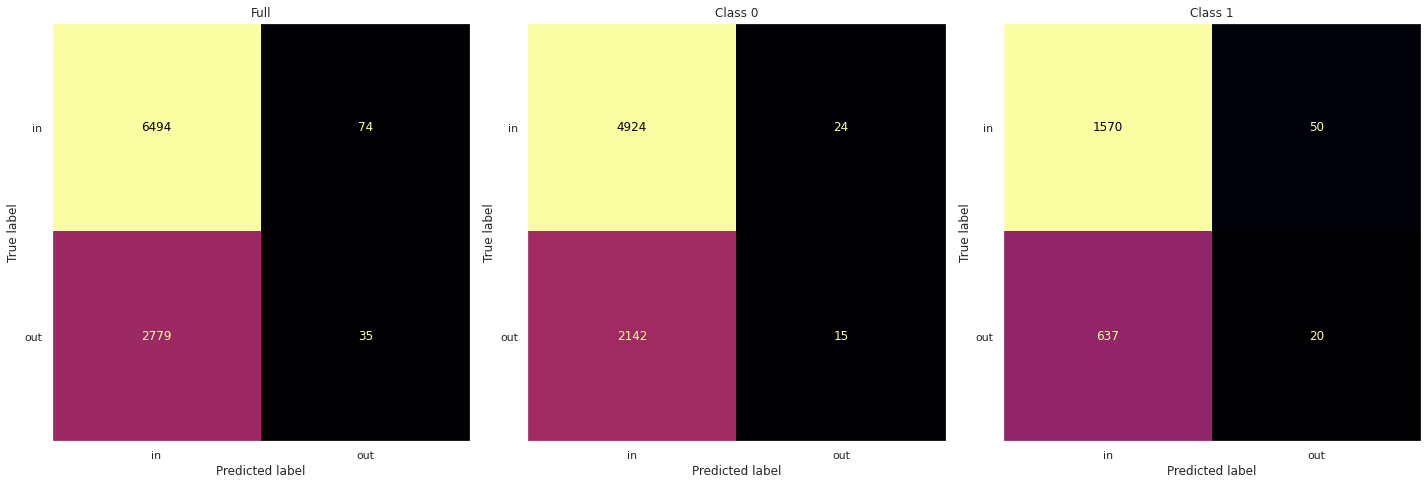

In [36]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [37]:
PATH = Path('../../decision_tree/statistical_noisy_filter/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.81      0.75      6443
         out       0.28      0.17      0.21      2757

    accuracy                           0.62      9200
   macro avg       0.49      0.49      0.48      9200
weighted avg       0.57      0.62      0.59      9200


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4887
         out       0.34      0.01      0.02      2129

    accuracy                           0.69      7016
   macro avg       0.52      0.50      0.42      7016
weighted avg       0.59      0.69      0.58      7016


Class 1
              precision    recall  f1-score   support

          in       0.67      0.22      0.34      1556
         out       0.27      0.73      0.40       628

    accuracy                           0.37      2184
   macro avg       0.47      0.48      0.37      2184
weighted avg       0.56      0.37      0.35 

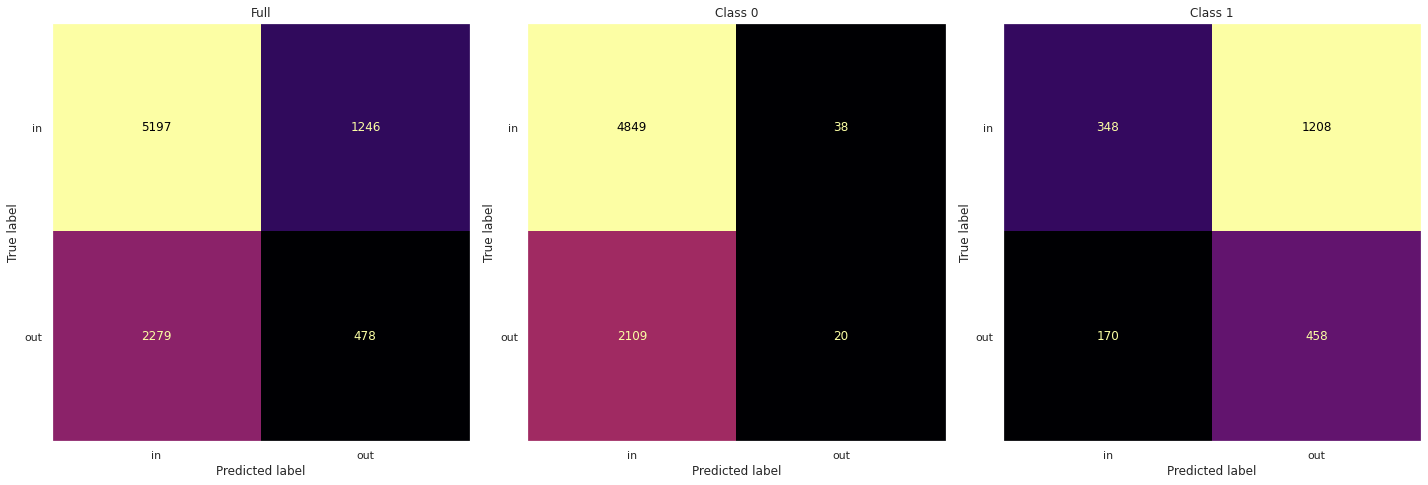

In [38]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [39]:
PATH = Path('../../decision_tree/trepan/noisy/diva/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.96      0.81      6624
         out       0.36      0.06      0.10      2839

    accuracy                           0.69      9463
   macro avg       0.53      0.51      0.45      9463
weighted avg       0.60      0.69      0.60      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80      4965
         out       0.36      0.07      0.12      2165

    accuracy                           0.68      7130
   macro avg       0.53      0.51      0.46      7130
weighted avg       0.60      0.68      0.60      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.42      2333
weighted avg       0.51      0.71      0.59 

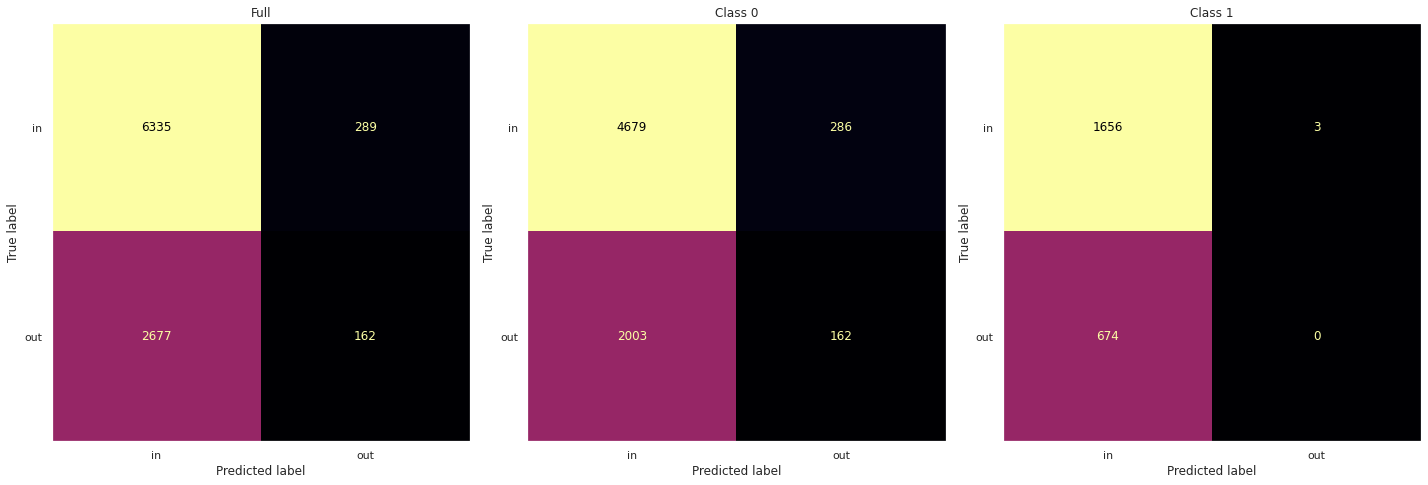

In [40]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [41]:
PATH = Path('../../decision_tree/trepan/noisy_filtering/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      6624
         out       0.34      0.02      0.04      2839

    accuracy                           0.69      9463
   macro avg       0.52      0.50      0.43      9463
weighted avg       0.59      0.69      0.58      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.81      4965
         out       0.35      0.03      0.05      2165

    accuracy                           0.69      7130
   macro avg       0.52      0.50      0.43      7130
weighted avg       0.59      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.42      2333
weighted avg       0.51      0.71      0.59 

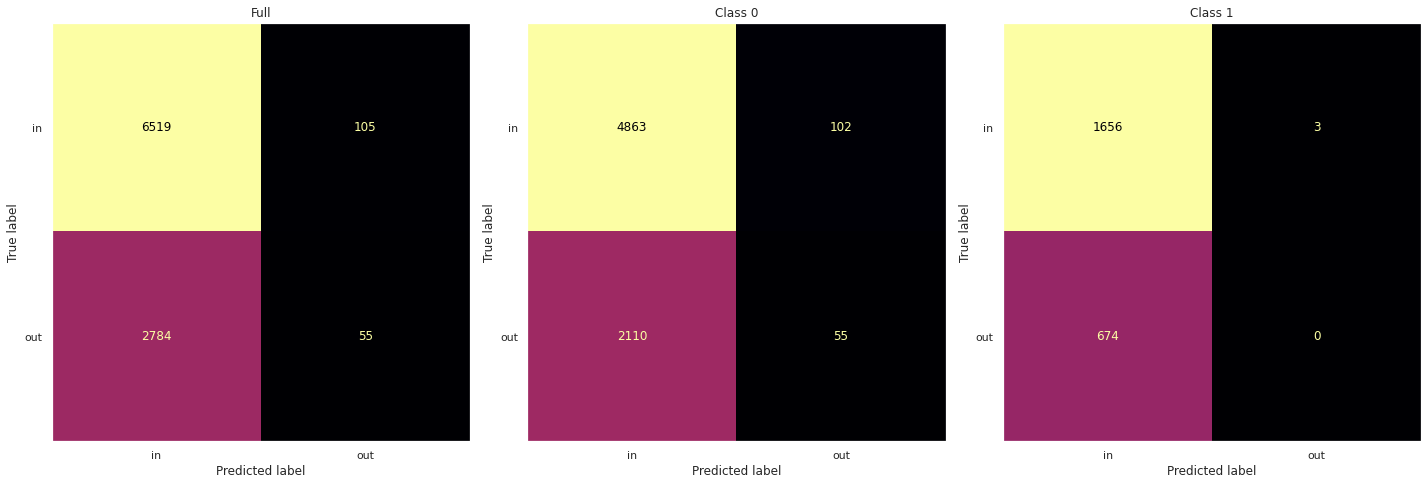

In [42]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [43]:
PATH = Path('../../decision_tree/trepan/statistical/diva/experiment_output/')
assert PATH.exists()

/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/pyth

report full
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      6621
         out       0.00      0.00      0.00      2837

    accuracy                           0.70      9458
   macro avg       0.35      0.50      0.41      9458
weighted avg       0.49      0.70      0.58      9458


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4962
         out       0.00      0.00      0.00      2163

    accuracy                           0.70      7125
   macro avg       0.35      0.50      0.41      7125
weighted avg       0.49      0.70      0.57      7125


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.42      2333
weighted avg       0.51      0.71      0.59 

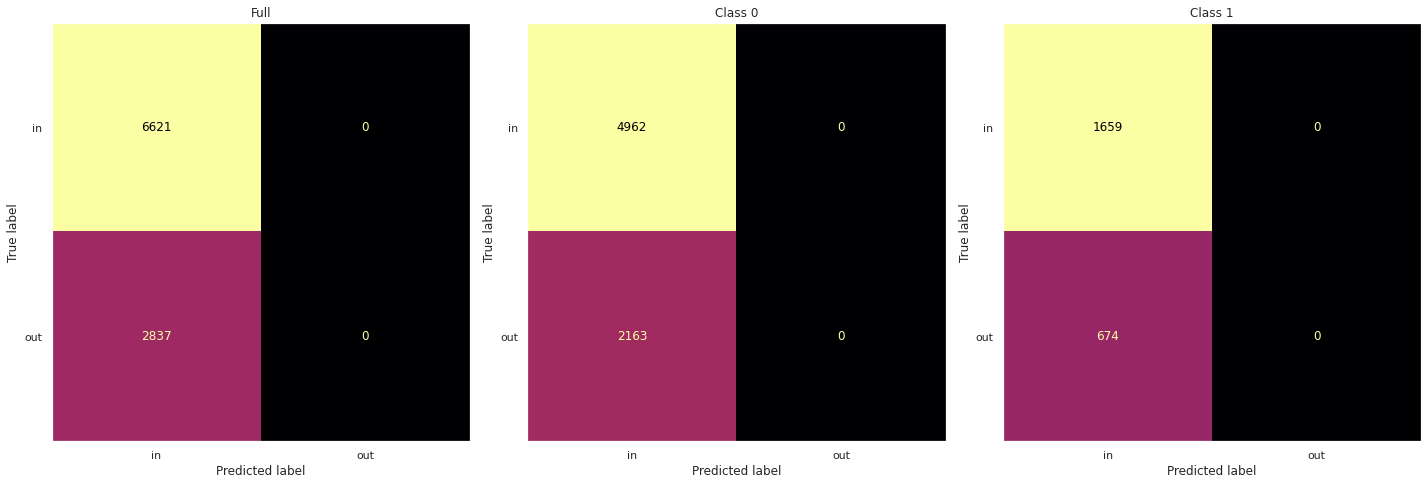

In [44]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [45]:
PATH = Path('../../decision_tree/trepan/statistical_filtering/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.71      0.88      0.79      1942
         out       0.39      0.17      0.24       846

    accuracy                           0.67      2788
   macro avg       0.55      0.53      0.52      2788
weighted avg       0.61      0.67      0.62      2788


Class 0
              precision    recall  f1-score   support

          in       0.66      0.45      0.53       400
         out       0.39      0.60      0.47       236

    accuracy                           0.51       636
   macro avg       0.52      0.53      0.50       636
weighted avg       0.56      0.51      0.51       636


Class 1
              precision    recall  f1-score   support

          in       0.72      1.00      0.83      1542
         out       0.46      0.01      0.02       610

    accuracy                           0.72      2152
   macro avg       0.59      0.50      0.43      2152
weighted avg       0.65      0.72      0.60 

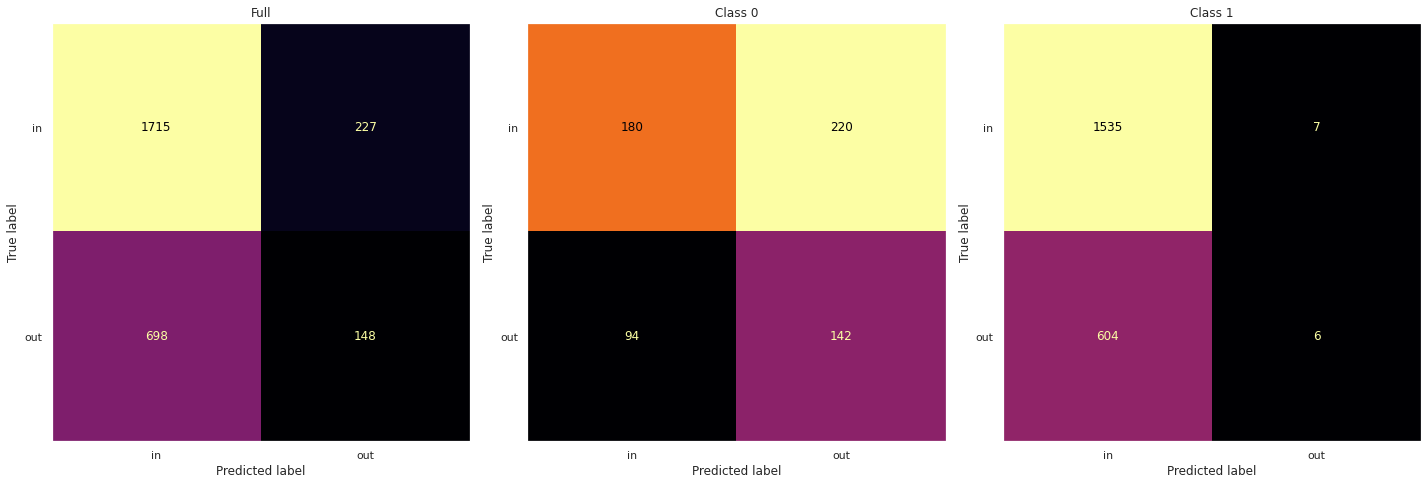

In [46]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [47]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_filtering_nobalanced/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.71      0.28      0.40      6616
         out       0.30      0.73      0.43      2832

    accuracy                           0.41      9448
   macro avg       0.50      0.50      0.41      9448
weighted avg       0.58      0.41      0.41      9448


Class 0
              precision    recall  f1-score   support

          in       0.66      0.04      0.07      4959
         out       0.30      0.96      0.46      2159

    accuracy                           0.32      7118
   macro avg       0.48      0.50      0.26      7118
weighted avg       0.55      0.32      0.19      7118


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1657
         out       0.00      0.00      0.00       673

    accuracy                           0.71      2330
   macro avg       0.36      0.50      0.42      2330
weighted avg       0.51      0.71      0.59 

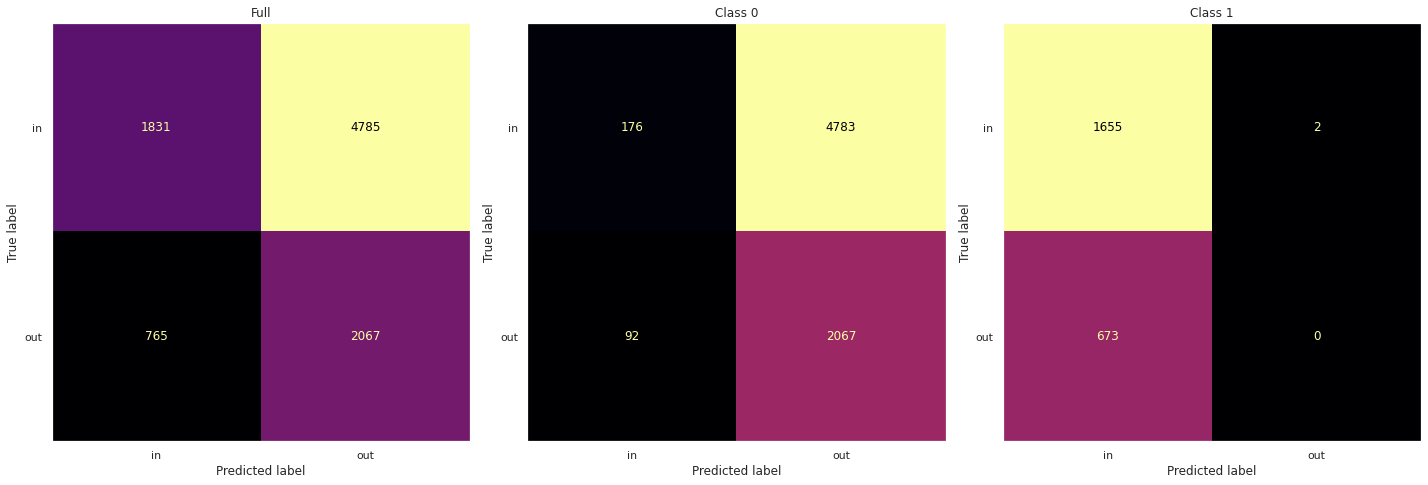

In [48]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False` Instances Selection: `Quantiles`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [49]:
PATH = Path('../../decision_tree/trepan/trepan_statistical_nobalanced/diva/experiment_output/')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.70      0.97      0.81      2086
         out       0.36      0.03      0.06       912

    accuracy                           0.69      2998
   macro avg       0.53      0.50      0.44      2998
weighted avg       0.59      0.69      0.58      2998


Class 0
              precision    recall  f1-score   support

          in       0.64      0.87      0.74       427
         out       0.36      0.13      0.19       238

    accuracy                           0.60       665
   macro avg       0.50      0.50      0.46       665
weighted avg       0.54      0.60      0.54       665


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.42      2333
weighted avg       0.51      0.71      0.59 

/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


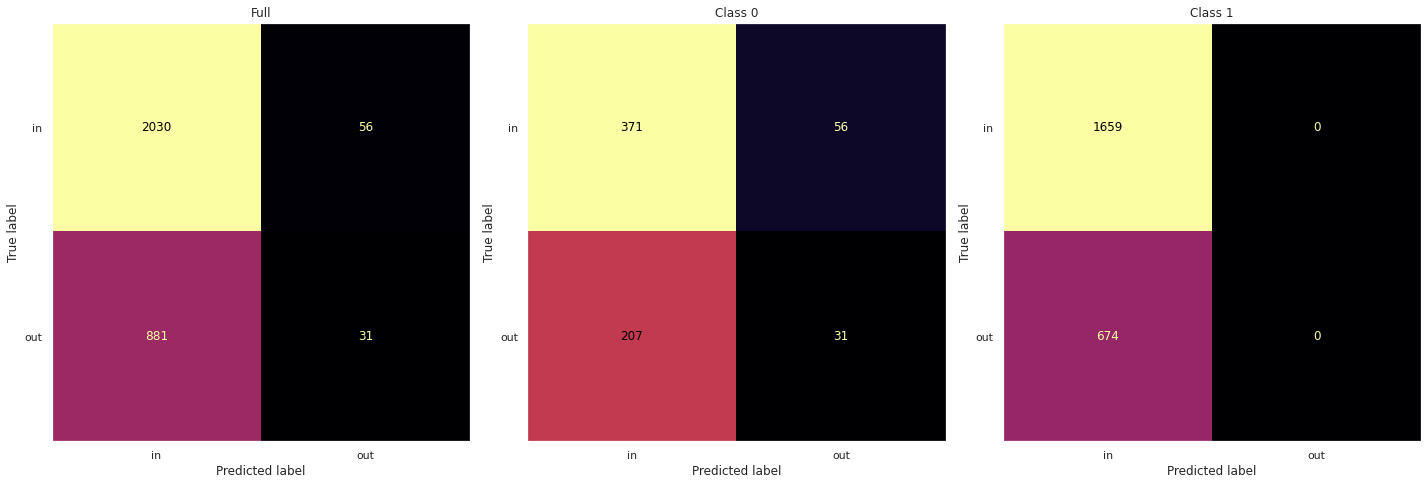

In [50]:
attack_0, attack_1, instances = load_attack_models(PATH)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Noisy` on `Black Box Train` Explainer: `Decision Tree`  Instances Selection: `Distance`

In [51]:
PATH = Path('../../decision_tree/CFS/diva/noisy/experiment_output')
assert PATH.exists()

report full
              precision    recall  f1-score   support

          in       0.69      0.31      0.43      6575
         out       0.30      0.68      0.41      2807

    accuracy                           0.42      9382
   macro avg       0.50      0.49      0.42      9382
weighted avg       0.58      0.42      0.42      9382


Class 0
              precision    recall  f1-score   support

          in       0.63      0.08      0.14      4916
         out       0.30      0.89      0.45      2133

    accuracy                           0.33      7049
   macro avg       0.46      0.49      0.29      7049
weighted avg       0.53      0.33      0.23      7049


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.41      2333
weighted avg       0.51      0.71      0.59 

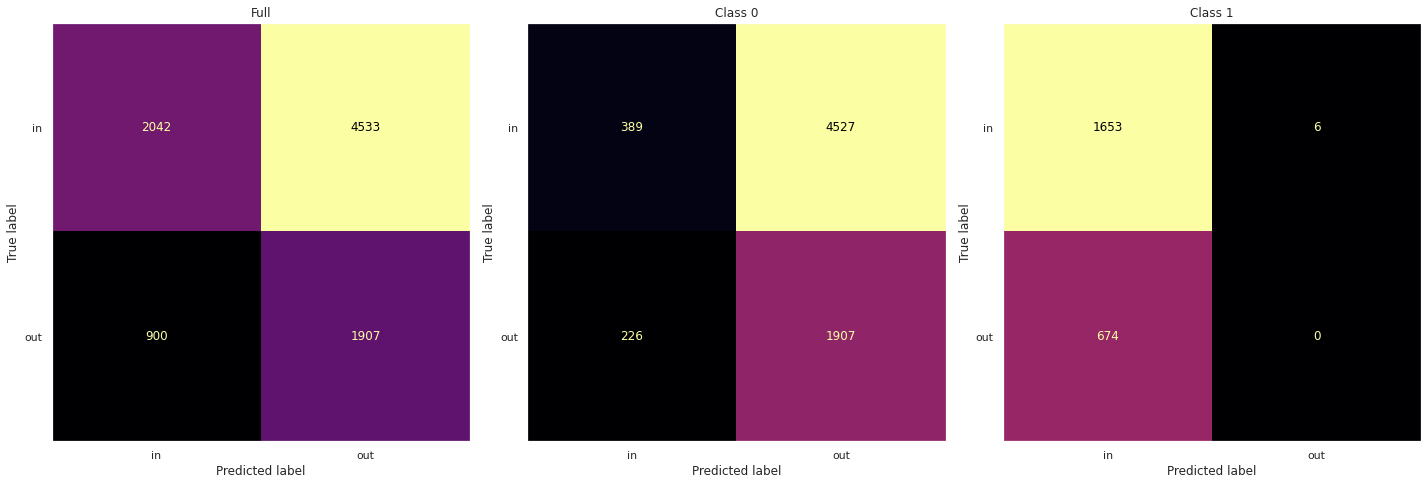

In [52]:
attack_0, attack_1, instances = load_attack_models(PATH,  load_instances=False)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `CFS` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Instances Selection: `Distance`

In [53]:
PATH = Path('../../decision_tree/CFS/diva/statistical/experiment_output/')
assert PATH.exists()

/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gzinno/mlem/venv/lib/pyth

report full
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      6623
         out       0.00      0.00      0.00      2839

    accuracy                           0.70      9462
   macro avg       0.35      0.50      0.41      9462
weighted avg       0.49      0.70      0.58      9462


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4964
         out       0.00      0.00      0.00      2165

    accuracy                           0.70      7129
   macro avg       0.35      0.50      0.41      7129
weighted avg       0.48      0.70      0.57      7129


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.00      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.36      0.50      0.42      2333
weighted avg       0.51      0.71      0.59 

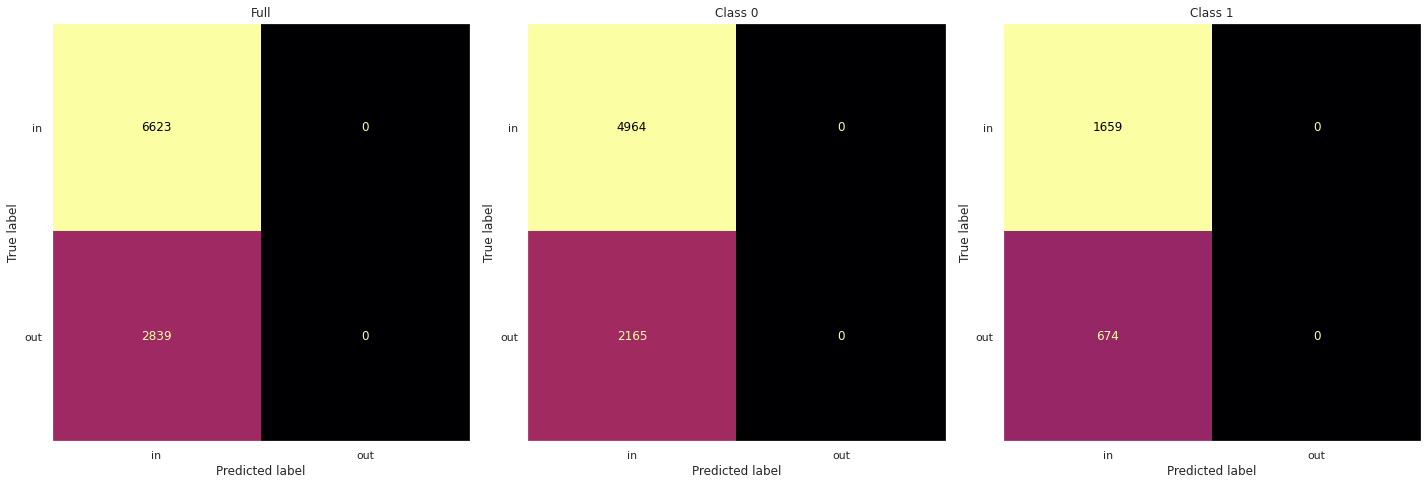

In [54]:
attack_0, attack_1, instances = load_attack_models(PATH,  load_instances=False)
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)